Modules nécessaires : 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from HiggsML.ingestion import Ingestion
from HiggsML.datasets import download_dataset
from sample_code_submission.neural_network import NeuralNetwork
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys

warnings.filterwarnings("ignore")

Charger les données : 

In [2]:
data = download_dataset(
    "blackSwan_data"
)  # change to "blackSwan_data" for the actual data

# load train set
data.load_train_set()
data_set = data.get_train_set()

2025-06-05 09:47:29,511 - HiggsML.datasets     - INFO     - Handling as dataset name: blackSwan_data
2025-06-05 09:47:29,511 - HiggsML.datasets     - INFO     - Current working directory: c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A
2025-06-05 09:47:29,515 - HiggsML.datasets     - INFO     - Total rows: 2000000
2025-06-05 09:47:29,515 - HiggsML.datasets     - INFO     - Test size: 600000
2025-06-05 09:47:29,611 - HiggsML.datasets     - INFO     - Selected train size: 1400000
2025-06-05 09:47:30,766 - HiggsML.datasets     - INFO     - Data loaded successfully


In [3]:
target = data_set["labels"]
weights = data_set["weights"]
detailed_label = data_set["detailed_labels"]
keys = np.unique(detailed_label)

Direction

In [4]:
root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Root directory is c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A


Import Submission Model

In [5]:
path.append(submission_dir)
from model import Model

Testing Settings

In [6]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 25,  # Number of pseudo-experiments to run per set
    "num_of_sets": 25,  # Number of sets of pseudo-experiments to run
}

RANDOM_SEED = 42


In [7]:
test_settings = TEST_SETTINGS.copy()

random_state = np.random.RandomState(RANDOM_SEED)
test_settings["ground_truth_mus"] = (
    random_state.uniform(0.1, 3, test_settings["num_of_sets"])
).tolist()

random_settings_file = os.path.join(output_dir, "test_settings.json")
with open(random_settings_file, "w") as f:
    json.dump(test_settings, f)

Boucle sur "Ingestion" en faisant varier epochs

Fonction bouclée: 

Significance

In [8]:

def optimization(train_data): 
    L_batchsize = [8,16,32,64,128,256,512,1024,2048]
    sigmax = 0
  
    for k in range(len(L_batchsize)):
        ingestion = Ingestion(data)
        # initialize submission
        ingestion.init_submission(Model, "NN")
        ingestion.model.model.batchsize = L_batchsize[k]
        print(ingestion.model.model.batchsize)
        ingestion.fit_submission()
        sig1 = ingestion.model.sig
        print(sig1)
        #visualisation des données :
        if sig1>sigmax: 
            sigmax = sig1
            batchsize_max = L_batchsize[k]
    return sigmax, batchsize_max



Il y a plusieurs problématique : 
Comment modifier une variable epochs de notre 

Lancement de la boucle

2025-06-05 09:47:32,106 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:47:32,110 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-05 09:47:32,572 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:47:32,658 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  676.5201915599276
sum_bkg_weights:  105042.47980844008


2025-06-05 09:47:33,122 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:47:33,137 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  677.3510362784072
sum_bkg_weights:  105041.64896372157


2025-06-05 09:47:33,549 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:47:33,722 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  666.342217342047
sum_bkg_weights:  105052.65778265797
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
8
Epoch 1/5
6250/6250 - 13s - 2ms/step - accuracy: 0.7921 - loss: 2.0043
Epoch 2/5
6250/6250 - 11s - 2ms/step - accuracy: 0.8104 - loss: 1.9124
Epoch 3/5
6250/6250 - 11s - 2ms/step - accuracy: 0.8126 - loss: 1.8851
Epoch 4/5
6250/6250 - 11s - 2ms/step - accuracy: 0.8157 - loss: 1.8717
Epoch 5/5
6250/6250 - 11s - 2ms/step - accuracy: 0.8172 - loss: 1.8548
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step  
score shape before threshold (45801,)
score shape after threshold (45801,)
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step
saved_info {'beta': np.float64(18998.91222402111), 'gamma': np.float64(511.01498790596276), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000001DAB63BF7E0>, 'jes_fit': <function jes_fitter.<locals

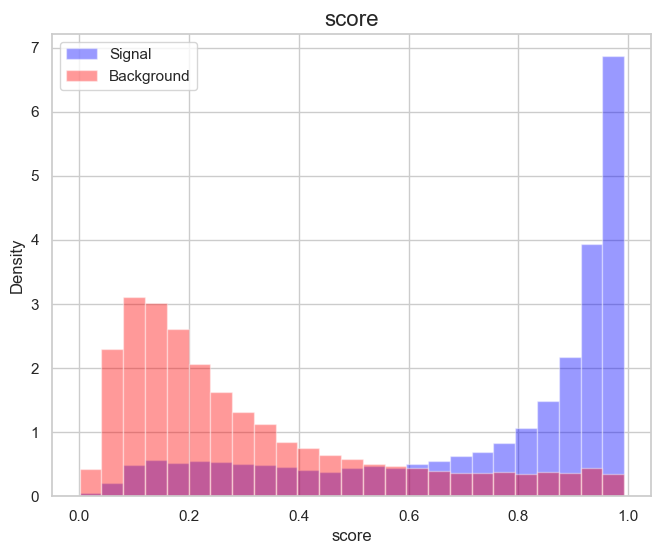

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


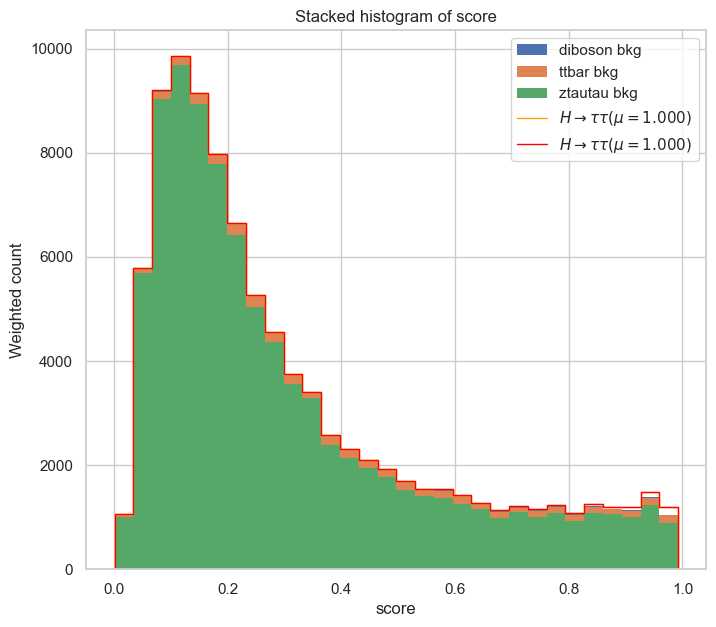

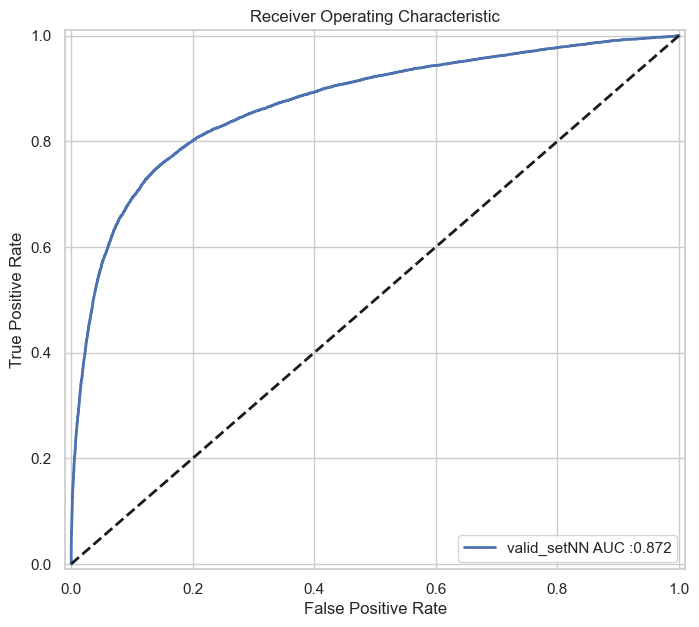

2025-06-05 09:48:44,853 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:48:44,866 - HiggsML.datasets     - INFO     - Selected train size: 50000


5.929380596325584


2025-06-05 09:48:45,228 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:48:45,249 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  668.4751185215471
sum_bkg_weights:  105050.52488147846


2025-06-05 09:48:45,602 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:48:45,626 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  676.557979368805
sum_bkg_weights:  105042.44202063118


2025-06-05 09:48:45,968 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:48:46,035 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  675.162253445872
sum_bkg_weights:  105043.83774655411
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
16
Epoch 1/5
3125/3125 - 7s - 2ms/step - accuracy: 0.7933 - loss: 1.9943
Epoch 2/5
3125/3125 - 6s - 2ms/step - accuracy: 0.8097 - loss: 1.9038
Epoch 3/5
3125/3125 - 6s - 2ms/step - accuracy: 0.8156 - loss: 1.8764
Epoch 4/5
3125/3125 - 6s - 2ms/step - accuracy: 0.8172 - loss: 1.8639
Epoch 5/5
3125/3125 - 6s - 2ms/step - accuracy: 0.8172 - loss: 1.8498
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45905,)
score shape after threshold (45905,)
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step
saved_info {'beta': np.float64(15337.659233778659), 'gamma': np.float64(495.73142036899014), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000001DAB8B24540>, 'jes_fit': <function jes_fitter.<locals>.fit

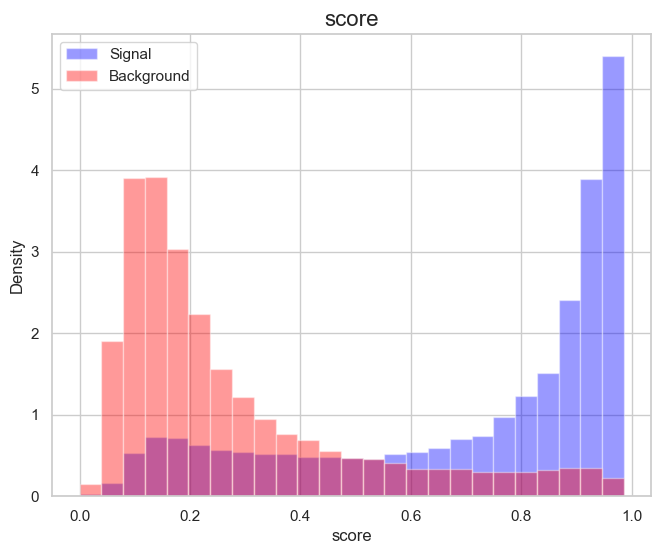

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


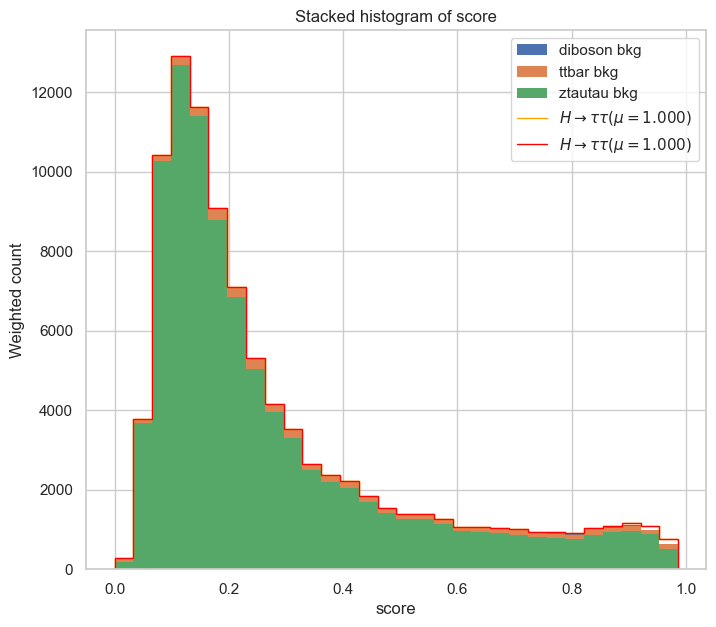

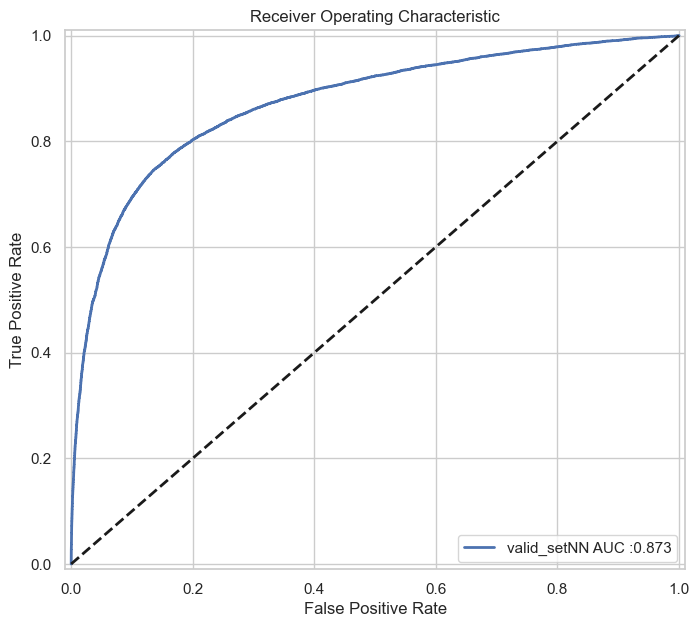

2025-06-05 09:49:30,470 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:49:30,483 - HiggsML.datasets     - INFO     - Selected train size: 50000


6.5984425371055435


2025-06-05 09:49:30,872 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:49:30,898 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  669.4574079395359
sum_bkg_weights:  105049.54259206048


2025-06-05 09:49:31,277 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:49:31,299 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  676.7194685707194
sum_bkg_weights:  105042.28053142926


2025-06-05 09:49:31,678 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:49:31,746 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  674.0131964787116
sum_bkg_weights:  105044.98680352126
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
32
Epoch 1/5
1563/1563 - 4s - 3ms/step - accuracy: 0.7899 - loss: 2.0184
Epoch 2/5
1563/1563 - 3s - 2ms/step - accuracy: 0.8077 - loss: 1.9130
Epoch 3/5
1563/1563 - 3s - 2ms/step - accuracy: 0.8114 - loss: 1.8882
Epoch 4/5
1563/1563 - 3s - 2ms/step - accuracy: 0.8139 - loss: 1.8736
Epoch 5/5
1563/1563 - 3s - 2ms/step - accuracy: 0.8176 - loss: 1.8576
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45861,)
score shape after threshold (45861,)
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step
saved_info {'beta': np.float64(16175.03516477034), 'gamma': np.float64(496.04525929519525), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000001DAB623E0C0>, 'jes_fit': <function jes_fitter.<locals>.f

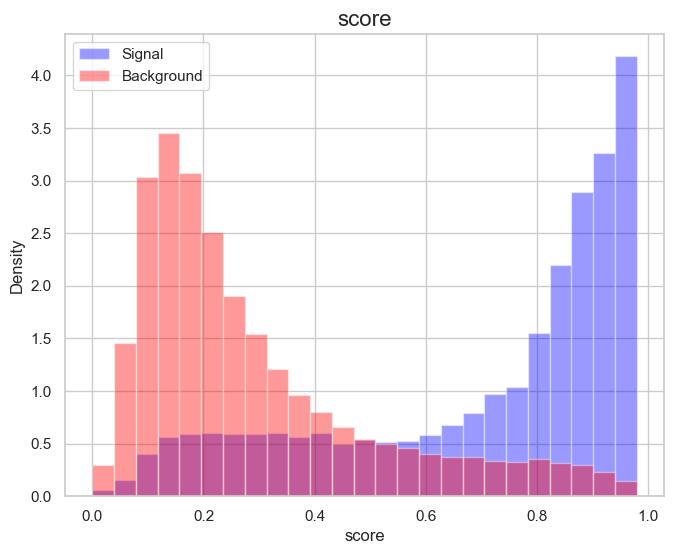

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


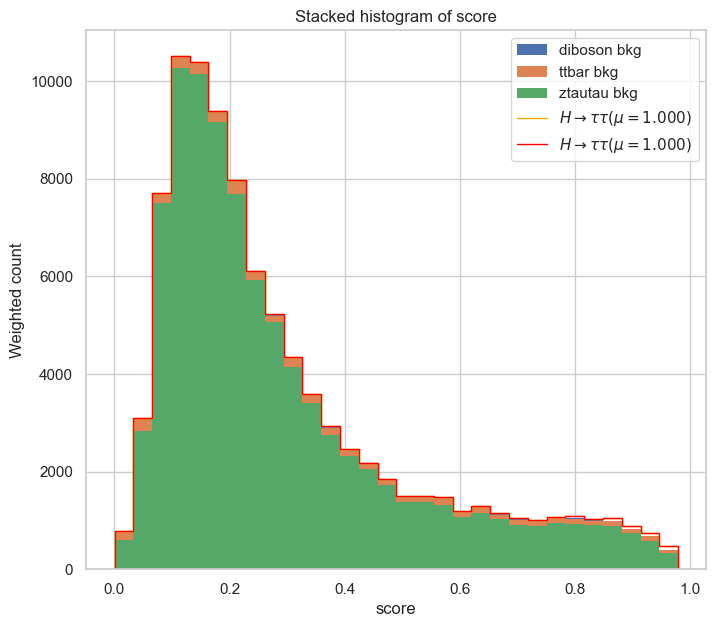

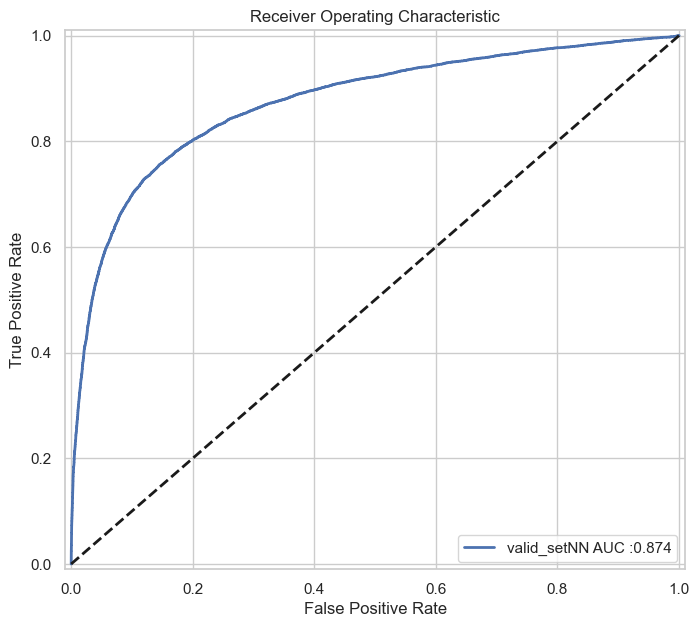

2025-06-05 09:50:01,987 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:50:01,991 - HiggsML.datasets     - INFO     - Selected train size: 50000


5.879456336683819


2025-06-05 09:50:02,369 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:50:02,402 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  676.5342587324594
sum_bkg_weights:  105042.46574126756


2025-06-05 09:50:02,792 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:50:02,819 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  671.9489647947232
sum_bkg_weights:  105047.05103520527


2025-06-05 09:50:03,264 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:50:03,323 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  671.7011216924817
sum_bkg_weights:  105047.29887830754
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
64
Epoch 1/5
782/782 - 3s - 4ms/step - accuracy: 0.7870 - loss: 2.0325
Epoch 2/5
782/782 - 2s - 2ms/step - accuracy: 0.8079 - loss: 1.9017
Epoch 3/5
782/782 - 2s - 2ms/step - accuracy: 0.8121 - loss: 1.8713
Epoch 4/5
782/782 - 2s - 2ms/step - accuracy: 0.8155 - loss: 1.8547
Epoch 5/5
782/782 - 2s - 2ms/step - accuracy: 0.8171 - loss: 1.8450
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45865,)
score shape after threshold (45865,)
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
saved_info {'beta': np.float64(18755.539324789), 'gamma': np.float64(509.88571700808325), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000001DAB9D6F600>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0

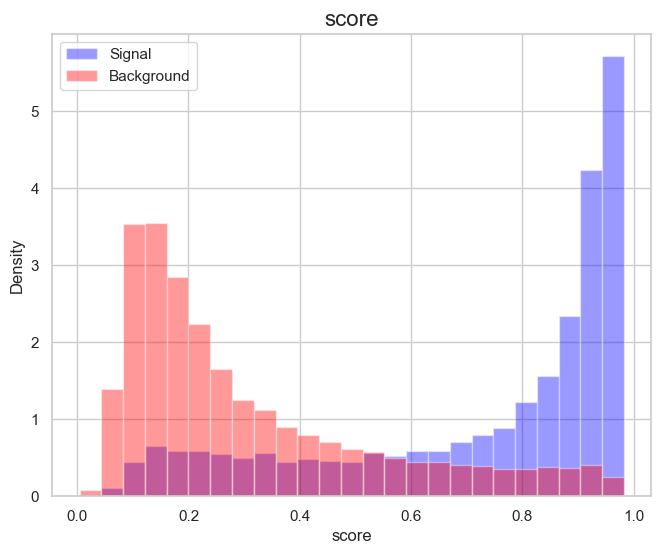

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


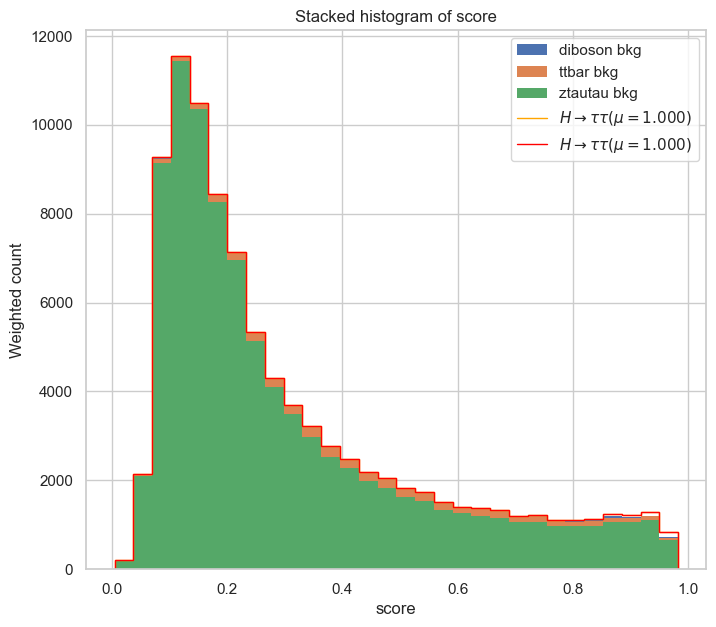

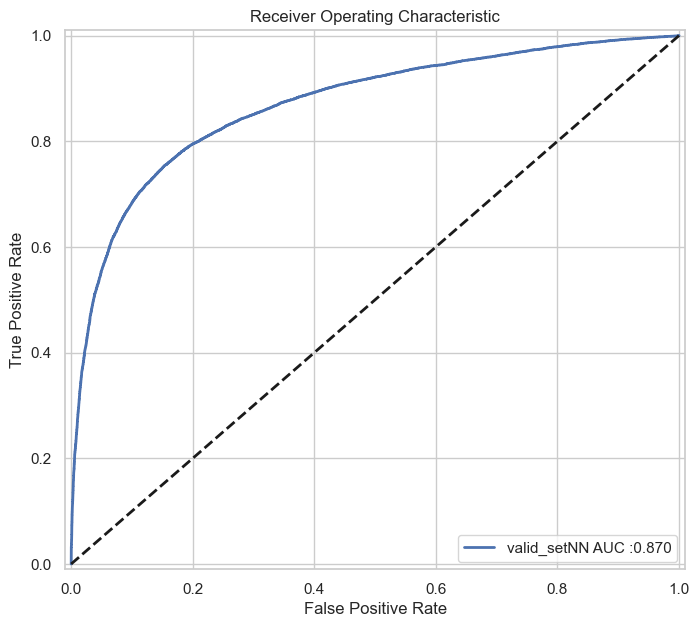

2025-06-05 09:50:28,005 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:50:28,015 - HiggsML.datasets     - INFO     - Selected train size: 50000


6.111064419053326


2025-06-05 09:50:28,381 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:50:28,405 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  675.5668077176833
sum_bkg_weights:  105043.43319228229


2025-06-05 09:50:28,798 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:50:28,814 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  674.3536647475458
sum_bkg_weights:  105044.64633525244


2025-06-05 09:50:29,204 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:50:29,266 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  670.2642613793566
sum_bkg_weights:  105048.73573862061
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
128
Epoch 1/5
391/391 - 3s - 7ms/step - accuracy: 0.7769 - loss: 2.0828
Epoch 2/5
391/391 - 1s - 2ms/step - accuracy: 0.8053 - loss: 1.9214
Epoch 3/5
391/391 - 1s - 2ms/step - accuracy: 0.8109 - loss: 1.8889
Epoch 4/5
391/391 - 1s - 3ms/step - accuracy: 0.8130 - loss: 1.8687
Epoch 5/5
391/391 - 1s - 3ms/step - accuracy: 0.8137 - loss: 1.8602
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45942,)
score shape after threshold (45942,)
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
saved_info {'beta': np.float64(16917.384812967754), 'gamma': np.float64(498.16373788309943), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000001DAB81000E0>, 'jes_fit': <function jes_fitter.<locals>.fit_function 

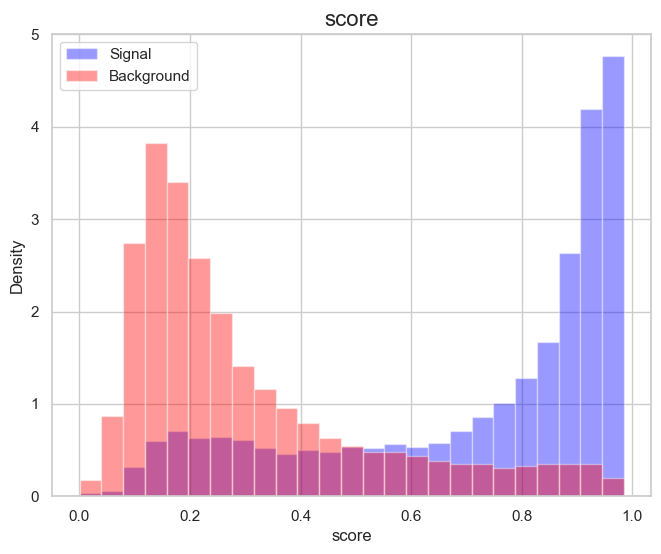

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


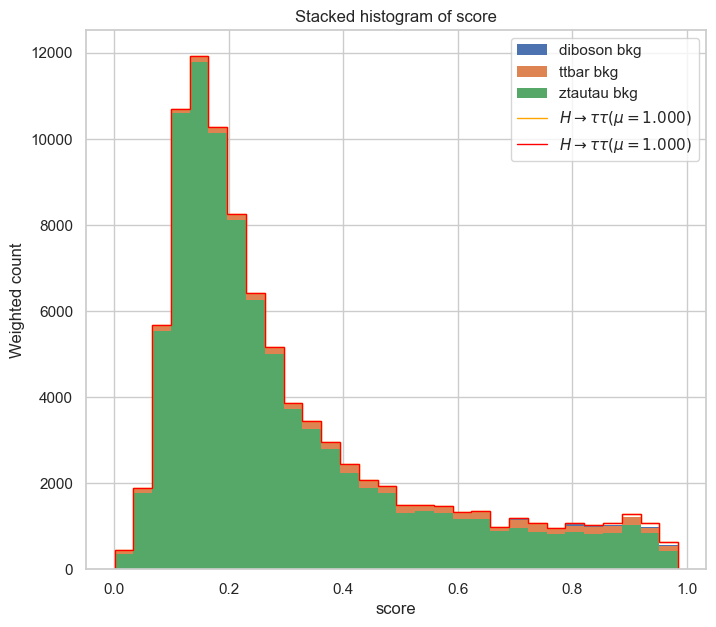

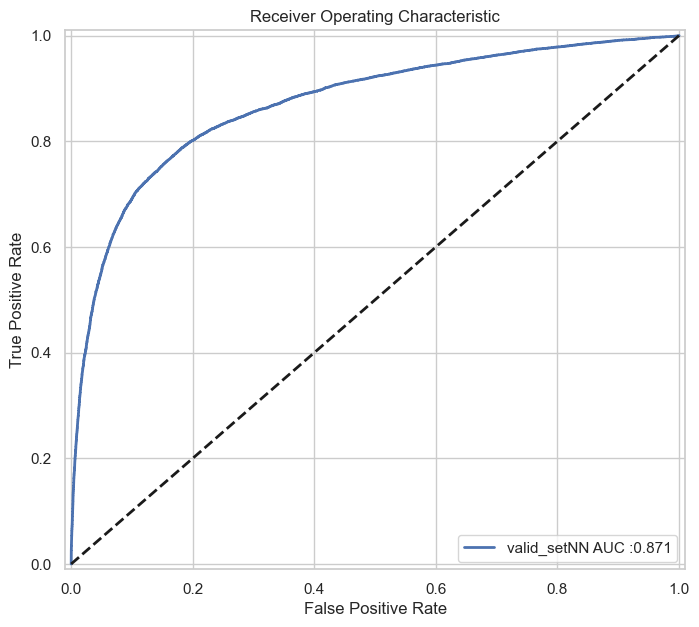

2025-06-05 09:50:52,614 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:50:52,621 - HiggsML.datasets     - INFO     - Selected train size: 50000


5.680786537986811


2025-06-05 09:50:53,013 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:50:53,061 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  665.5774688297248
sum_bkg_weights:  105053.42253117023


2025-06-05 09:50:53,613 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:50:53,649 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  680.5180628183781
sum_bkg_weights:  105038.48193718164


2025-06-05 09:50:54,057 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:50:54,149 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  674.1357225803757
sum_bkg_weights:  105044.86427741962
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
256
Epoch 1/5
196/196 - 2s - 11ms/step - accuracy: 0.7618 - loss: 2.1678
Epoch 2/5
196/196 - 1s - 3ms/step - accuracy: 0.8023 - loss: 1.9545
Epoch 3/5
196/196 - 1s - 3ms/step - accuracy: 0.8066 - loss: 1.9078
Epoch 4/5
196/196 - 1s - 3ms/step - accuracy: 0.8121 - loss: 1.8869
Epoch 5/5
196/196 - 1s - 3ms/step - accuracy: 0.8130 - loss: 1.8690
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45885,)
score shape after threshold (45885,)
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
saved_info {'beta': np.float64(15132.759679312472), 'gamma': np.float64(493.2132010775252), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000001DAB609D300>, 'jes_fit': <function jes_fitter.<locals>.fit_function 

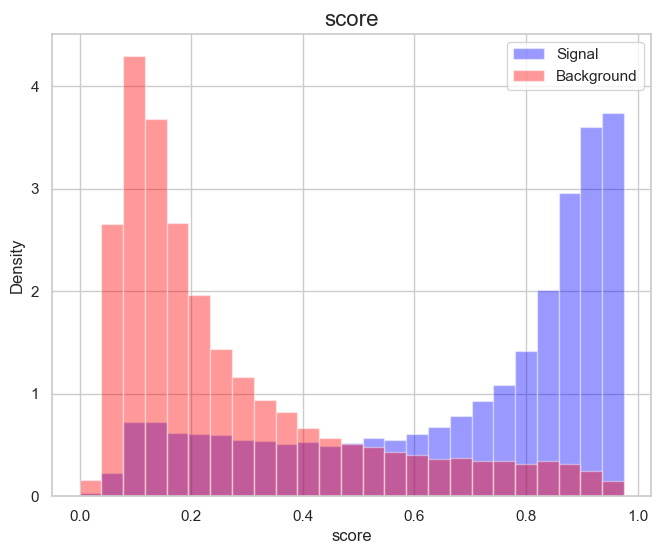

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


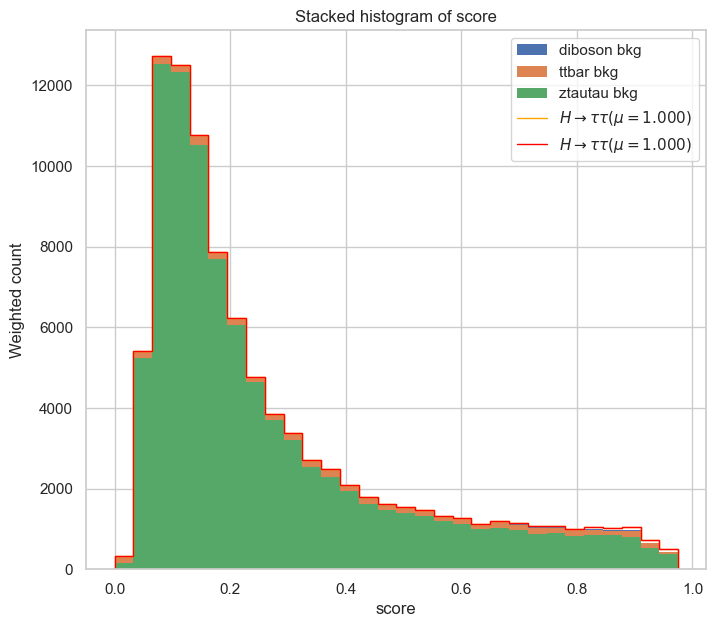

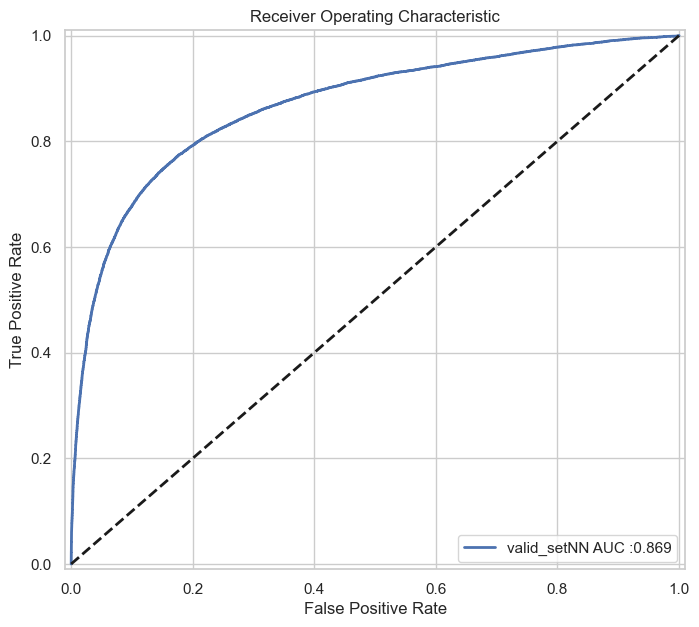

2025-06-05 09:51:14,182 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:51:14,192 - HiggsML.datasets     - INFO     - Selected train size: 50000


5.851871147420594


2025-06-05 09:51:14,586 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:51:14,620 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  673.0344743102471
sum_bkg_weights:  105045.96552568977


2025-06-05 09:51:15,024 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:51:15,066 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  676.1839528014251
sum_bkg_weights:  105042.81604719859


2025-06-05 09:51:15,492 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:51:15,566 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  670.9655373959513
sum_bkg_weights:  105048.03446260402
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
512
Epoch 1/5
98/98 - 2s - 18ms/step - accuracy: 0.7498 - loss: 2.2605
Epoch 2/5
98/98 - 0s - 4ms/step - accuracy: 0.7937 - loss: 1.9841
Epoch 3/5
98/98 - 0s - 4ms/step - accuracy: 0.8035 - loss: 1.9313
Epoch 4/5
98/98 - 0s - 4ms/step - accuracy: 0.8077 - loss: 1.9031
Epoch 5/5
98/98 - 0s - 4ms/step - accuracy: 0.8106 - loss: 1.8811
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45829,)
score shape after threshold (45829,)
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
saved_info {'beta': np.float64(17024.75092774704), 'gamma': np.float64(493.42292581958543), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000001DABE69B560>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x00000

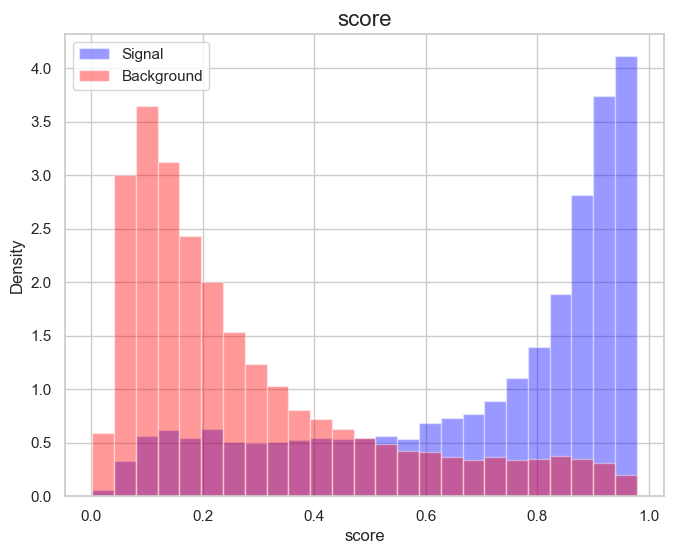

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


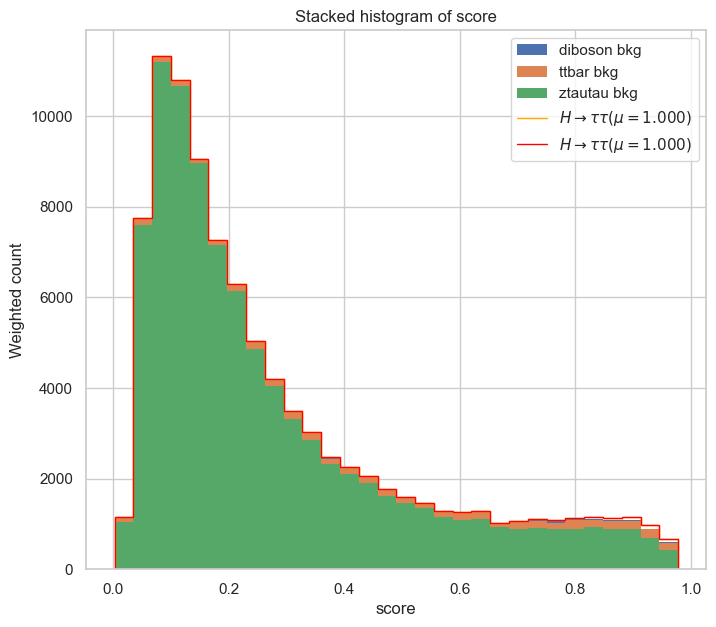

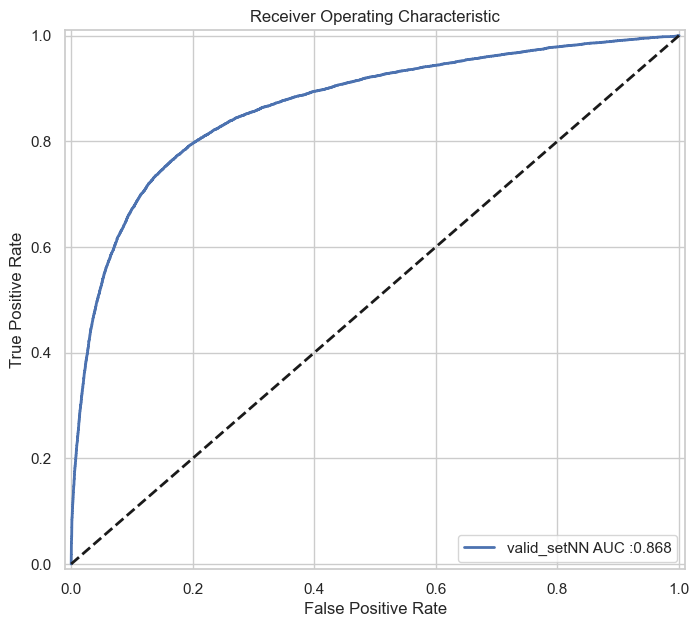

2025-06-05 09:51:34,110 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:51:34,117 - HiggsML.datasets     - INFO     - Selected train size: 50000


5.478615538700363


2025-06-05 09:51:34,567 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:51:34,592 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  675.0435045116222
sum_bkg_weights:  105043.95649548835


2025-06-05 09:51:34,958 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:51:34,970 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  662.9620790310057
sum_bkg_weights:  105056.037920969


2025-06-05 09:51:35,348 - HiggsML.datasets     - INFO     - Data loaded successfully



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  682.2635303684992
sum_bkg_weights:  105036.73646963149
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'


2025-06-05 09:51:35,641 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model


 Model is NN
1024
Epoch 1/5
49/49 - 2s - 32ms/step - accuracy: 0.7388 - loss: 2.3750
Epoch 2/5
49/49 - 0s - 5ms/step - accuracy: 0.7780 - loss: 2.0837
Epoch 3/5
49/49 - 0s - 5ms/step - accuracy: 0.7925 - loss: 1.9983
Epoch 4/5
49/49 - 0s - 5ms/step - accuracy: 0.7996 - loss: 1.9571
Epoch 5/5
49/49 - 0s - 5ms/step - accuracy: 0.8034 - loss: 1.9307
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45806,)
score shape after threshold (45806,)
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
saved_info {'beta': np.float64(17412.843542364437), 'gamma': np.float64(503.54807380214544), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000001DABE250360>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x000001DABE2523E0>}
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step
5.012726419693011
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Train Results: 
	 mu_hat  :  0.1344491653933010

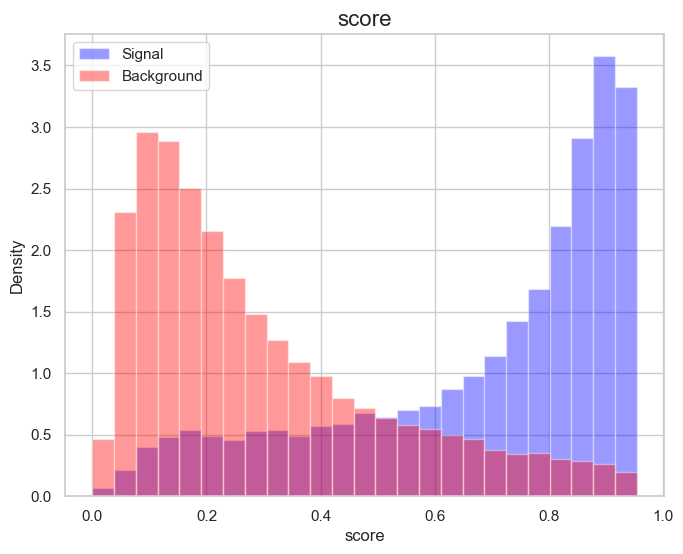

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


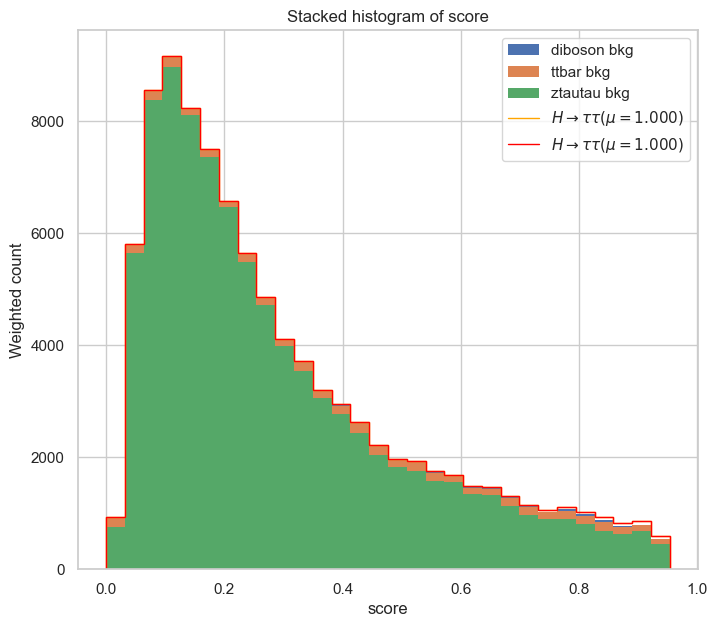

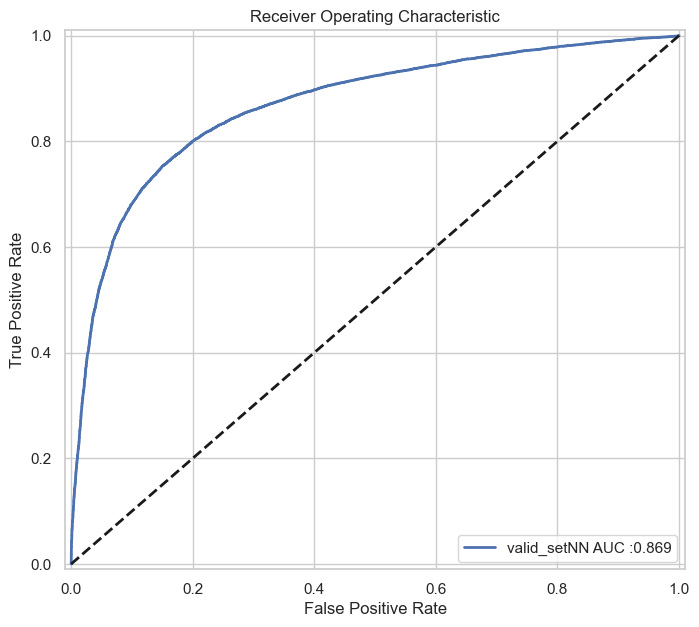

2025-06-05 09:51:51,884 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-05 09:51:51,884 - HiggsML.datasets     - INFO     - Selected train size: 50000


5.012726419693011


2025-06-05 09:51:52,279 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:51:52,294 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  674.5905426642112
sum_bkg_weights:  105044.40945733583


2025-06-05 09:51:52,656 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:51:52,688 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  678.6639808918854
sum_bkg_weights:  105040.33601910809


2025-06-05 09:51:53,146 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-05 09:51:53,202 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  666.956709919157
sum_bkg_weights:  105052.04329008082
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
2048
Epoch 1/5
25/25 - 2s - 67ms/step - accuracy: 0.6931 - loss: 2.5866
Epoch 2/5
25/25 - 0s - 7ms/step - accuracy: 0.7599 - loss: 2.2320
Epoch 3/5
25/25 - 0s - 8ms/step - accuracy: 0.7770 - loss: 2.0897
Epoch 4/5
25/25 - 0s - 7ms/step - accuracy: 0.7865 - loss: 2.0132
Epoch 5/5
25/25 - 0s - 7ms/step - accuracy: 0.7937 - loss: 1.9675
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
score shape before threshold (45867,)
score shape after threshold (45867,)
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
saved_info {'beta': np.float64(17873.304370400747), 'gamma': np.float64(496.3568276243344), 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000001DAB898FE20>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x0

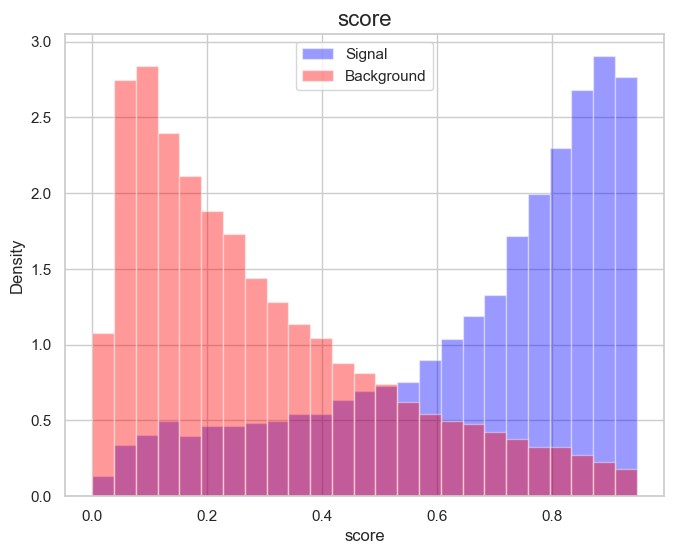

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


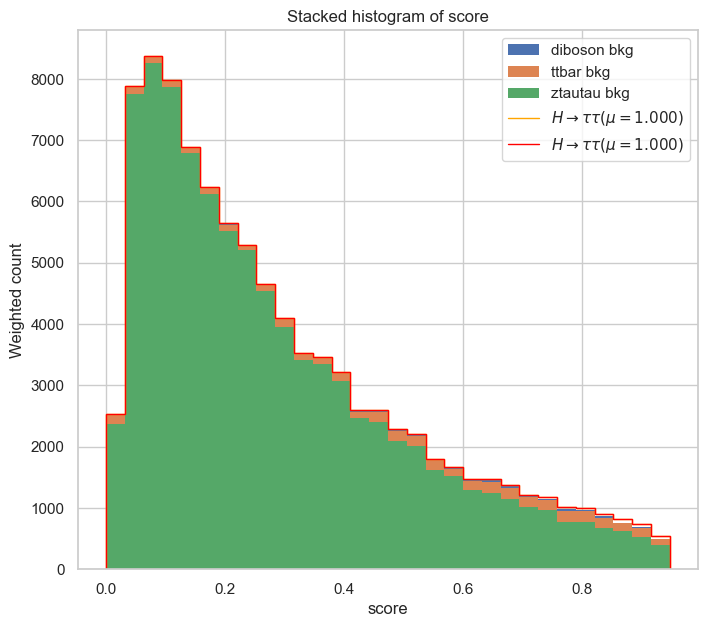

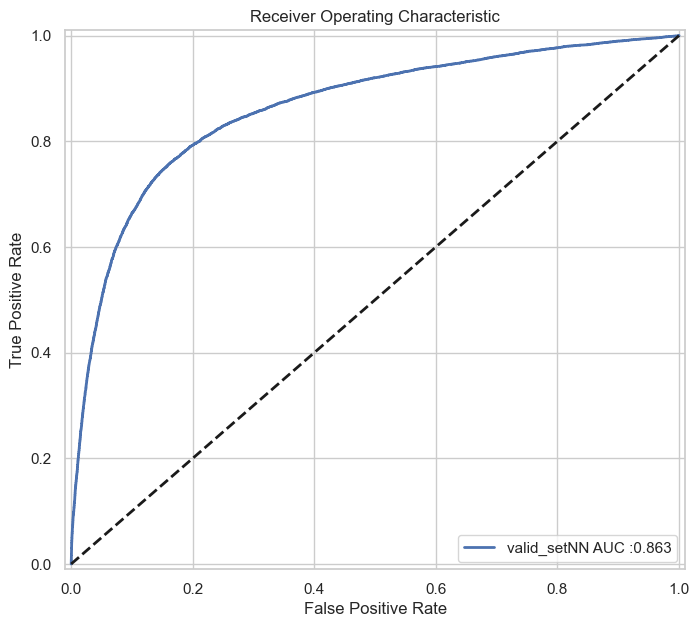

4.755175286312564


(np.float64(6.5984425371055435), 16)

In [9]:
optimization(data_set)